# Intent-based Chatbot

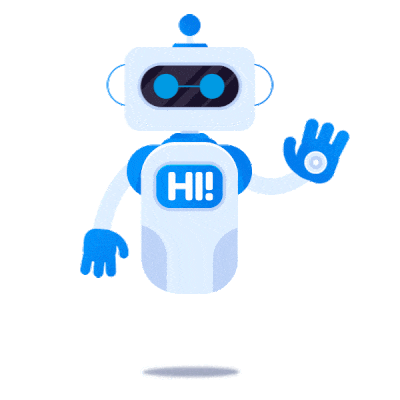

An **intent-based chatbot** looks for key terms and ‘entities’ in the messages it receives. instead of relying on specific input, the chatbot can identify the meaning the message is trying to convey. (And then offer a relevant, tailored response.) Intent-based bots enable a natural conversation style and offer less restrictions than their flow-based counterparts. 

An intent-based chatbot offers several benefits in terms of the end user experience.

• Natural conversation

The use of NLP means that users can talk to an intent-based chatbot in a similar way as they would a friend. They don’t need to provide specific terms or press buttons for the bot to understand them. This makes for a smoother and more engaging conversation experience.

• More flexible than other bots

Intent-based chatbots are less restricted than flow-based bots. (Which can only follow a set conversational path.) They can better adapt to a user changing their mind, for example. This means that they can more easily carry out a wider range of tasks and adapt to changing conversation topics.

# Import Libraries and Load the Data

**Dense layer** is a classic fully connected neural network layer : each input node is connected to each output node.
 
In **Dropout layer** the activations are set to zero for some random nodes. This is a way to prevent overfitting.  A dropout in LSTM  generates 4 different dropout masks, for creating different inputs for each of the different gates.

**Activation function** decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. Activation functions are useful because they add non-linearities into neural networks, allowing the neural networks to learn powerful operations.


**SGD** randomly picks one data point from the whole data set at each iteration to reduce the computations enormously.


**NLTK** contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

In [3]:
import numpy as np

from keras.models import Sequential

from keras.layers import Dense, Activation, Dropout 

from tensorflow.keras.optimizers import SGD

import random

import nltk

from nltk.stem import WordNetLemmatizer #helps in returning the base or dictionary form of a word known as the lemma.

lemmatizer = WordNetLemmatizer()

import json

import pickle #Pickling is a way to convert a python object (list, dict, etc.) into a character stream that contains all the information necessary to reconstruct the object in another python script.

In [ ]:
intents_file = open('intents.json').read()

intents = json.loads(intents_file)

In [4]:
intents

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi',
    'Is anyone there?',
    'Hey',
    'Hola',
    'Hello',
    'Good day',
    'Hi',
    'whatsup',
    'how have you been'],
   'responses': ['Hello',
    'Hey',
    'Good to see you again',
    'Hi there, how can I help?'],
   'context': ['']},
  {'tag': 'salutation1',
   'patterns': ['Good Morning', 'morning'],
   'responses': ['Good Morning to you too!', 'Indeed a very Good morning'],
   'context_set': ''},
  {'tag': 'salutation2',
   'patterns': ['Good Night', 'sweet derams'],
   'responses': ['Good Night to you too! Sweet Dreams', 'Take Care!!'],
   'context_set': ''},
  {'tag': 'stopwords',
   'patterns': ['i',
    'me',
    'my',
    'myself',
    'we',
    'our',
    'ours',
    'ourselves',
    'you',
    "you're",
    "you've",
    "you'll",
    "you'd",
    'your',
    'yours',
    'yourself',
    'yourselves',
    'he',
    'him',
    'his',
    'himself',
    'she',
    "she's",
    'her',
    'hers',
    'herself',


In [5]:
type(intents)

dict

# Preprocessing the Data

By observing the intents file, we can see that each tag contains a list of patterns and responses. We tokenize each pattern and add the words in a list. Also, we create a list of classes and documents to add all the intents associated with patterns.

**Tokenizing** (Breaking the sentences into words)

Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. Token can be considered as parts like a word is a token in a sentence, and a sentence is a token in a paragraph.

In [6]:
words=[]
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.']

for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        word = nltk.word_tokenize(pattern) # to split a sentence into tokens or words. 
        words.extend(word)        
        
        #add documents in the corpus
        documents.append((word, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

print(documents)

[(['Hi'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hey'], 'greeting'), (['Hola'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Hi'], 'greeting'), (['whatsup'], 'greeting'), (['how', 'have', 'you', 'been'], 'greeting'), (['Good', 'Morning'], 'salutation1'), (['morning'], 'salutation1'), (['Good', 'Night'], 'salutation2'), (['sweet', 'derams'], 'salutation2'), (['i'], 'stopwords'), (['me'], 'stopwords'), (['my'], 'stopwords'), (['myself'], 'stopwords'), (['we'], 'stopwords'), (['our'], 'stopwords'), (['ours'], 'stopwords'), (['ourselves'], 'stopwords'), (['you'], 'stopwords'), (['you', "'re"], 'stopwords'), (['you', "'ve"], 'stopwords'), (['you', "'ll"], 'stopwords'), (['you', "'d"], 'stopwords'), (['your'], 'stopwords'), (['yours'], 'stopwords'), (['yourself'], 'stopwords'), (['yourselves'], 'stopwords'), (['he'], 'stopwords'), (['him'], 'stopwords'), (['his'], 'stopwords'), (['himself'], 'stopwords'), (['she'], 'stopwords'), (['she', "'s"

**Lemmatizing**

Converting words into the lemma form. For example, the words play, playing, plays, played, etc. will all be replaced with play. 

In [7]:
# lemmaztize and lower each word and remove duplicates

nltk.download('wordnet')
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]

words = sorted(list(set(words)))

# sort classes
classes = sorted(list(set(classes)))

# documents = combination between patterns and intents

print (len(documents), "documents")

# classes = intents

print (len(classes), "classes", classes)

# words = all words, vocabulary

print (len(words), "unique lemmatized words", words)

pickle.dump(words,open('words.pkl','wb'))

pickle.dump(classes,open('classes.pkl','wb'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


306 documents
29 classes ['Appointments', 'Appointments1', 'Contactdetails', 'Contactdetails1', 'Contactdetails2', 'Contactdetails3', 'Location', 'Location1', 'Orders', 'Orders1', 'Orders2', 'Weather', 'age', 'customer_satisfaction', 'goodbye', 'greeting', 'misc', 'missing_id', 'name', 'order_components', 'order_tracking', 'salutation1', 'salutation2', 'salutation3', 'search_department', 'services', 'stopwords', 'thanks', 'wellbeing']
277 unique lemmatized words ["'d", "'ll", "'re", "'s", "'ve", '1234567890', '345a23', '4', '431b67', '5', '561a24', '562b78', 'a', 'about', 'above', 'after', 'again', 'against', 'age', 'ain', 'all', 'alright', 'am', 'an', 'and', 'any', 'anyone', 'app', 'appointment', 'are', 'aren', 'at', 'awesome', 'bangalore', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'brach', 'but', 'by', 'bye', 'call', 'can', 'chatting', 'chennai', 'company', 'component', 'comprises', 'contact', 'could', 'couldn', 'd', 'date', 'day', 'dehradun', 'delay', '

# Create Training and Testing Data

To train the model, convert each input pattern into numbers. First, lemmatize each word of the pattern and create a list of zeroes of the same length as the total number of words. Set value 1 to only those indexes that contain the word in the patterns. In the same way, create the output by setting 1 to the class input the pattern belongs to.

In [8]:
# creating the training data
training = []

# creating empty array for the output
output_empty = [0] * len(classes)

# training set, bag of words for every sentence
for doc in documents:

    # initializing bag of words
    bag = []

    # list of tokenized words for the pattern
    word_patterns = doc[0]
    
    # lemmatize each word - creating base word, in attempt to represent related words
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]

    # creating the bag of words array with 1, if word is found in current pattern
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

        

    # output is a '0' for each tag and '1' for current tag (for each pattern)

    output_row = list(output_empty)

    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

# shuffling the features to make numpy array

random.shuffle(training)

training = np.array(training)

# creating training and testing lists. X - patterns, Y - intents

train_x = list(training[:,0])

train_y = list(training[:,1])

print("Training data is created")

Training data is created


C:\Users\Asus\AppData\Local\Temp/ipykernel_17916/979955598.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


# Training the Model

In [9]:
len(train_x[0])

277

In [10]:
len(train_y[0])

29

**ReLU** helps to prevent the exponential growth in the computation required to operate the neural network. It does not activate all the neurons at the same time.

**Softmax** is used as the activation function for multi-class classification problems where class membership is required on more than two class labels. Softmax layer must have the same number of nodes as the output layer.  The output of a Softmax is a vector (say v ) with probabilities of each possible outcome. The probabilities in vector v sums to one for all possible outcomes or classes.

**Dropout** is an approach to regularization to prevent overfitting in neural networks which helps reducing interdependent learning amongst the neurons.

**SGD** is easier to fit in the memory due to a single training example being processed by the network. It is computationally fast as only one sample is processed at a time. For larger datasets, it can converge faster as it causes updates to the parameters more frequently.

**Dense Layer** is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense.

**Cross-entropy loss**, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. **Categorical crossentropy** is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one. 

When the **decay** argument is specified, it will decrease the learning rate from the previous epoch by the given fixed amount.

In [11]:

model = Sequential()

model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))

model.add(Dropout(0.5))  #to reduce overfitting of the model

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(len(train_y[0]), activation='softmax'))


# Compiling model. SGD with Nesterov accelerated gradient gives good results for this model

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


#Training and saving the model 

hist = model.fit(np.array(train_x), np.array(train_y), epochs=120, batch_size=5, verbose=1)

model.save('ELIZA_chatbot.h5', hist)


print("model is created")

C:\My installs\anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/120
62/62 [==============================] - 0s 522us/step - loss: 2.4765 - accuracy: 0.5229
Epoch 2/120
62/62 [==============================] - 0s 569us/step - loss: 2.0620 - accuracy: 0.5850
Epoch 3/120
62/62 [==============================] - 0s 772us/step - loss: 1.9100 - accuracy: 0.5850
Epoch 4/120
62/62 [==============================] - 0s 447us/step - loss: 1.8150 - accuracy: 0.5882
Epoch 5/120
62/62 [==============================] - 0s 781us/step - loss: 1.7599 - accuracy: 0.5980
Epoch 6/120
62/62 [==============================] - 0s 438us/step - loss: 1.6250 - accuracy: 0.6078
Epoch 7/120
62/62 [==============================] - 0s 570us/step - loss: 1.5428 - accuracy: 0.6503
Epoch 8/120
62/62 [==============================] - 0s 570us/step - loss: 1.4224 - accuracy: 0.6471
Epoch 9/120
62/62 [==============================] - 0s 551us/step - loss: 1.3465 - accuracy: 0.6503
Epoch 10/120
62/62 [==============================] - 0s 462us/step - loss: 1.3172 - accura

62/62 [==============================] - 0s 682us/step - loss: 0.1284 - accuracy: 0.9641
Epoch 82/120
62/62 [==============================] - 0s 570us/step - loss: 0.1194 - accuracy: 0.9673
Epoch 83/120
62/62 [==============================] - 0s 574us/step - loss: 0.1528 - accuracy: 0.9510
Epoch 84/120
62/62 [==============================] - 0s 629us/step - loss: 0.1160 - accuracy: 0.9510
Epoch 85/120
62/62 [==============================] - 0s 474us/step - loss: 0.1308 - accuracy: 0.9542
Epoch 86/120
62/62 [==============================] - 0s 650us/step - loss: 0.1071 - accuracy: 0.9739
Epoch 87/120
62/62 [==============================] - 0s 474us/step - loss: 0.1568 - accuracy: 0.9444
Epoch 88/120
62/62 [==============================] - 0s 673us/step - loss: 0.1345 - accuracy: 0.9542
Epoch 89/120
62/62 [==============================] - 0s 693us/step - loss: 0.1392 - accuracy: 0.9510
Epoch 90/120
62/62 [==============================] - 0s 690us/step - loss: 0.1311 - accuracy: 

# Interacting With the Chatbot

Creating graphical user interface (GUI) for our chatbot using the Tkinter module to build the structure of the desktop application.

In [12]:
import nltk

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

import pickle

import numpy as np

from keras.models import load_model

model = load_model('ELIZA_chatbot.h5')

import json

import random

intents = json.loads(open('intents.json').read())

words = pickle.load(open('words.pkl','rb'))

classes = pickle.load(open('classes.pkl','rb'))


def clean_up_sentence(sentence):

    # tokenizing the pattern - splitting words into array

    sentence_words = nltk.word_tokenize(sentence)

    # stemming every word - reducing to base form

    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]

    return sentence_words

# return bag of words array: 0 or 1 for words that exist in sentence


def bag_of_words(sentence, words, show_details=True):

    # tokenizing patterns

    sentence_words = clean_up_sentence(sentence)

    # bag of words - vocabulary matrix

    bag = [0]*len(words)  

    for s in sentence_words:

        for i,word in enumerate(words):

            if word == s: 

                # assign 1 if current word is in the vocabulary position

                bag[i] = 1

                if show_details:

                    print ("found in bag: %s" % word)

    return(np.array(bag))


def predict_class(sentence):
    # filtering below  threshold predictions
    p = bag_of_words(sentence, words,show_details=False)

    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25

    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]

    # sorting strength probability
    results.sort(key=lambda x: x[1], reverse=True)

    return_list = []

    for r in results:

        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})

    return return_list


def getResponse(ints, intents_json):

    tag = ints[0]['intent']

    list_of_intents = intents_json['intents']

    for i in list_of_intents:

        if(i['tag']== tag):

            result = random.choice(i['responses'])

            break

    return result

#Creating tkinter GUI

import tkinter

from tkinter import *


def send():

    msg = EntryBox.get("1.0",'end-1c').strip()

    EntryBox.delete("0.0",END)


    if msg != '':

        ChatBox.config(state=NORMAL)

        ChatBox.insert(END, "You: " + msg + '\n\n')

        ChatBox.config(foreground="#446665", font=("Verdana", 12 )) 

        ints = predict_class(msg)

        res = getResponse(ints, intents)

        

        ChatBox.insert(END, "Eliza: " + res + '\n\n')           

        ChatBox.config(state=DISABLED)

        ChatBox.yview(END)

root = Tk()

root.title("ELIZA : Chatbot")

root.geometry("400x500")

root.resizable(width=FALSE, height=FALSE)

#Creating Chat window

ChatBox = Text(root, bd=0, bg="white", height="8", width="50", font="Arial",)

ChatBox.config(state=DISABLED)

#Binding scrollbar to Chat window

scrollbar = Scrollbar(root, command=ChatBox.yview, cursor="arrow")

ChatBox['yscrollcommand'] = scrollbar.set

#Creating Button to send message

SendButton = Button(root, font=("Times New Roman",15,'bold'), text="Send", width="10", height=5,
                    bd=0, bg="#f9a602", activebackground="#3c9d9b",fg='#000000',

                    command= send )

#Creating the box to enter message
EntryBox = Text(root, bd=0, bg="white",width="29", height="4", font="Arial")

#EntryBox.bind("<Return>", send)

#Placing all components on the screen

scrollbar.place(x=376,y=6, height=386)

ChatBox.place(x=6,y=6, height=386, width=370)

EntryBox.place(x=128, y=401, height=90, width=265)

SendButton.place(x=6, y=401, height=90)

root.mainloop()

Here are some snaps of the output interface:
<br>
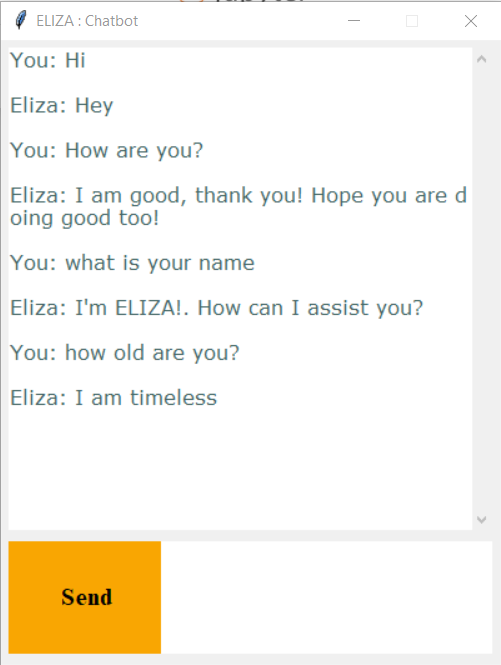
<br>
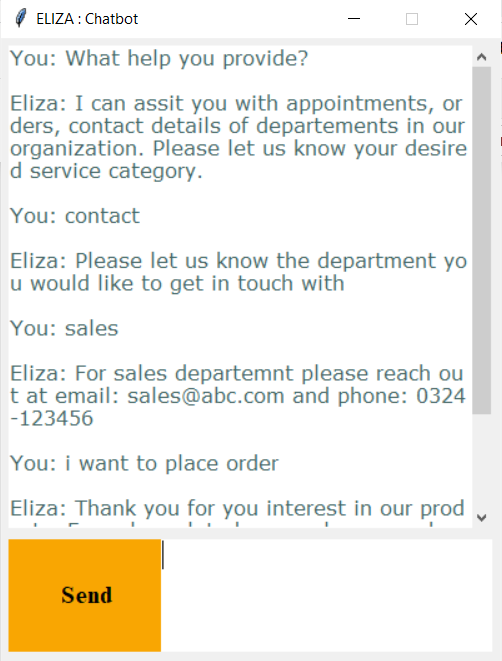
<br>
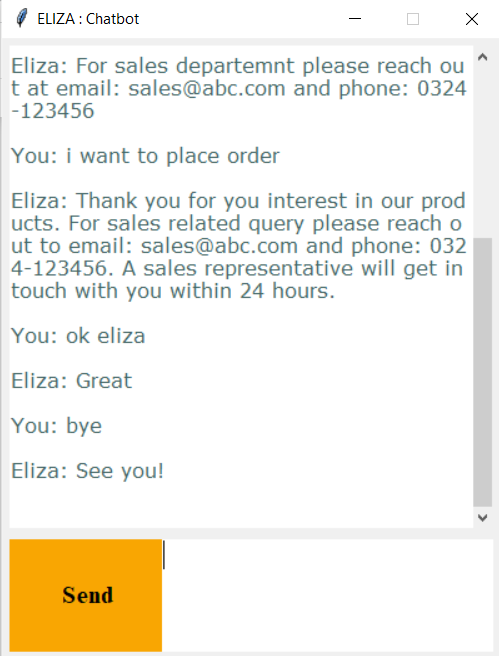
<br>
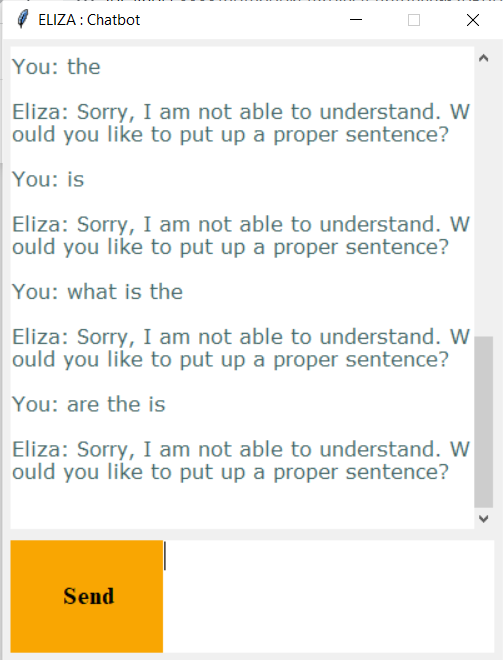